In [1]:
import os 

from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/hand_mlp/')


Mounted at /content/drive


In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/hand_keypoint_classifier.hdf5'
#dataset = 'model/keypoint_classifier/face_keypoint.csv'
#model_save_path = 'model/keypoint_classifier/face_keypoint_classifier.hdf5'

# 分類数設定

In [4]:
NUM_CLASSES = 60

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 3) + 1)))
#X_dataset = np.genfromtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (8 * 3) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 3, )),
    #tf.keras.layers.Input((8 * 3, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 63)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                1280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                660       
Total params: 2,150
Trainable params: 2,150
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
136/136 [==============================] - 1s 6ms/step - loss: 3.7179 - accuracy: 0.0695 - val_loss: 2.3064 - val_accuracy: 0.2982

Epoch 00001: saving model to model/keypoint_classifier/hand_keypoint_classifier.hdf5
Epoch 2/1000
136/136 [==============================] - 0s 3ms/step - loss: 2.3503 - accuracy: 0.2480 - val_loss: 2.0434 - val_accuracy: 0.3565

Epoch 00002: saving model to model/keypoint_classifier/hand_keypoint_classifier.hdf5
Epoch 3/1000
136/136 [==============================] - 0s 3ms/step - loss: 2.1445 - accuracy: 0.2750 - val_loss: 1.8548 - val_accuracy: 0.3764

Epoch 00003: saving model to model/keypoint_classifier/hand_keypoint_classifier.hdf5
Epoch 4/1000
136/136 [==============================] - 0s 3ms/step - loss: 2.0031 - accuracy: 0.3097 - val_loss: 1.6718 - val_accuracy: 0.4394

Epoch 00004: saving model to model/keypoint_classifier/hand_keypoint_classifier.hdf5
Epoch 5/1000
136/136 [==============================] - 0s 3ms/step - loss: 1.86

In [13]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

46/46 [==============================] - 0s 1ms/step - loss: 0.2960 - accuracy: 0.9656


In [14]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [15]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.83182224e-04 9.23449218e-01 4.00971249e-02 1.26240880e-03
 2.12480468e-14 1.22041041e-02 3.60055431e-03 4.88882558e-03
 4.66422498e-04 2.57416349e-03 2.17272980e-14 8.30821499e-15
 1.35050755e-14 8.51705605e-15 1.72031438e-03 8.19348048e-14
 3.19765881e-14 3.10183194e-14 8.67163736e-14 9.16351928e-05
 8.41281284e-03 9.63084864e-14 1.07235303e-14 3.88509143e-05
 3.61674530e-14 9.37301672e-15 4.26899269e-15 1.44028923e-14
 3.38073922e-14 1.33882765e-14 1.44457285e-14 8.33271881e-15
 1.06388463e-13 4.72803119e-15 1.09559934e-14 7.33863416e-15
 4.05533032e-15 1.48526075e-14 4.88791247e-15 2.71748481e-14
 8.13633845e-15 5.51132355e-14 1.02476587e-14 2.08605733e-14
 5.38569147e-05 5.94938070e-15 1.76242891e-14 1.83959124e-14
 3.57307339e-15 1.92711786e-14 2.41199832e-14 5.37674763e-14
 1.56516049e-04 6.28526060e-15 6.63093983e-15 1.26594326e-14
 2.37326773e-14 3.17686788e-14 1.10921175e-14 5.64549492e-15]
1


# 混同行列

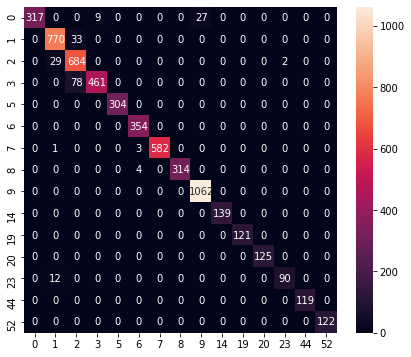

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       353
           1       0.95      0.96      0.95       803
           2       0.86      0.96      0.91       715
           3       0.98      0.86      0.91       539
           5       1.00      1.00      1.00       304
           6       0.98      1.00      0.99       354
           7       1.00      0.99      1.00       586
           8       1.00      0.99      0.99       318
           9       0.98      1.00      0.99      1062
          14       1.00      1.00      1.00       139
          19       1.00      1.00      1.00       121
          20       1.00      1.00      1.00       125
          23       0.98      0.88      0.93       102
          44       1.00      1.00      1.00       119
          52       1.00      1.00      1.00       122

    accuracy                           0.97      5762
   macro avg       0.98      0.97      0.97      5762
weig

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [17]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [18]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/hand_keypoint_classifier.tflite'
#tflite_save_path = 'model/keypoint_classifier/face_keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp9aro5opw/assets


6800

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 801 µs, sys: 0 ns, total: 801 µs
Wall time: 900 µs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.68539272e-04 9.22066808e-01 4.26820703e-02 1.35653745e-03
 2.50869627e-14 1.06988503e-02 3.22204200e-03 5.35014411e-03
 4.24665312e-04 2.77018920e-03 2.40918244e-14 9.42990684e-15
 1.56829488e-14 9.70078205e-15 1.79921044e-03 9.03194010e-14
 3.45212682e-14 3.57391729e-14 9.89209867e-14 1.06579973e-04
 8.26331135e-03 1.13123324e-13 1.30740366e-14 3.62701030e-05
 3.99203782e-14 1.05705460e-14 5.11425407e-15 1.59657223e-14
 4.07663236e-14 1.58840446e-14 1.65236324e-14 9.67646204e-15
 1.18345289e-13 5.39717705e-15 1.26513595e-14 8.01399471e-15
 4.64363198e-15 1.70775361e-14 5.91442577e-15 2.99452676e-14
 9.24878579e-15 6.13934427e-14 1.16758266e-14 2.35533164e-14
 4.23772035e-05 7.35896549e-15 2.06160670e-14 1.97721630e-14
 4.05102062e-15 2.22645998e-14 2.75995030e-14 6.33045997e-14
 2.12406172e-04 7.11239420e-15 7.57009269e-15 1.49159046e-14
 2.63913952e-14 3.31078447e-14 1.24981236e-14 6.14480009e-15]
1
